In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.lines as mlines


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Account
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")


# Variables for holding sentiments
sentiments = []
avg_compound_list = []
all_sentiment_list = []

# Loop through each user
for user in target_users:

    # Counter
    counter = 1
    
    # Variable for holding the oldest tweet
    oldest_tweet = None
    
    # Variables for holding sentiments- inside of for loop bec for each user, we want to re-initialize it
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Get 100 most recent tweets
    public_tweets = api.user_timeline(user, count =100, result_type="recent", max_id=oldest_tweet)
    #print(public_tweets)
  
    # Loop through all tweets 
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
            
            # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
        sentiments.append({"Date": tweet["created_at"], 
                               "Username": user,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
        counter += 1
    
    avg_sentiments = np.mean(compound_list)
    all_sentiment_list.append(avg_sentiments)
    #sentiment_list = {"User": user, "Compound": np.mean(compound_list)}

    # Print the Averages
    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.3f}")
    print(f"Positive: {np.mean(positive_list):.3f}")
    print(f"Neutral: {np.mean(neutral_list):.3f}")
    print(f"Negative: {np.mean(negative_list):.3f}")
    


User: @BBC
Compound: 0.118
Positive: 0.104
Neutral: 0.830
Negative: 0.066
User: @CBS
Compound: 0.256
Positive: 0.143
Neutral: 0.837
Negative: 0.021
User: @CNN
Compound: 0.049
Positive: 0.064
Neutral: 0.890
Negative: 0.046
User: @FoxNews
Compound: 0.063
Positive: 0.107
Neutral: 0.808
Negative: 0.085
User: @nytimes
Compound: -0.047
Positive: 0.064
Neutral: 0.863
Negative: 0.073


In [3]:
news_df = pd.DataFrame(sentiments).set_index("Username").round(2)

news_df.head()
#news_df

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
Username,,,,,,
@BBC,-0.25,Wed Aug 01 07:31:04 +0000 2018,0.85,0.15,0.00,1
@BBC,-0.54,Wed Aug 01 07:27:04 +0000 2018,0.86,0.14,0.00,2
@BBC,0.80,Wed Aug 01 07:02:06 +0000 2018,0.66,0.07,0.28,3
@BBC,0.00,Tue Jul 31 20:02:08 +0000 2018,1.00,0.00,0.00,4
@BBC,0.59,Tue Jul 31 19:01:03 +0000 2018,0.81,0.00,0.19,5


In [4]:
len(sentiments)

500

# Scatter Plot

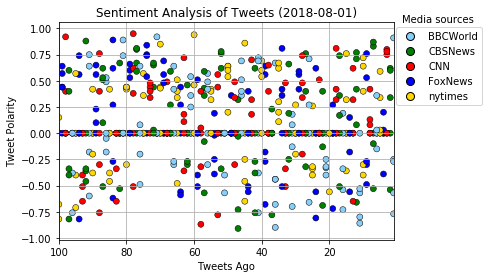

In [5]:
# Create plot
x_vals = news_df["Tweets Ago"]
y_vals = news_df["Compound"]
plt.scatter(x_vals,
         y_vals, marker="o", linewidth=0.5, edgecolors = 'black',
         alpha=1, c = ['LightSkyBlue', 'g', "r", "b", "gold"])

line1 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8, markerfacecolor="LightSkyBlue", markeredgecolor='black')
line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8, markerfacecolor="green",markeredgecolor='black')
line3 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8, markerfacecolor="Red",markeredgecolor='black')
line4 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8, markerfacecolor="Blue",markeredgecolor='black')
line5 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8, markerfacecolor="Gold",markeredgecolor='black')
plt.legend((line1,line2,line3,line4,line5),('BBCWorld','CBSNews', 'CNN', 'FoxNews','nytimes'),numpoints=1, loc=1,bbox_to_anchor=(1.28, 1))
plt.text(-12, 1.09,'Media sources', ha='center', va='center')

plt.grid(True)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.xlim([x_vals.max(),x_vals.min()]) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Images/sentiment_analysis.png")
plt.show()


# Bar Plot

In [6]:
all_sentiment_list

[0.11833500000000001, 0.255927, 0.048779, 0.06332800000000001, -0.047161]

In [7]:
avg_sentiment = {'User': target_users, 'Avg_Compound_Score': all_sentiment_list}
avg_sentiment_df = pd.DataFrame(avg_sentiment)
avg_sentiment_df


,User,Avg_Compound_Score
0,@BBC,0.118335
1,@CBS,0.255927
2,@CNN,0.048779
3,@FoxNews,0.063328
4,@nytimes,-0.047161


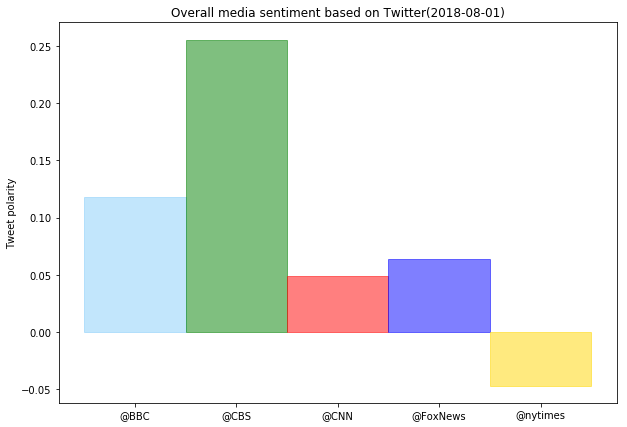

In [8]:
colors=["LightSkyBlue","Green","Red","Blue","Gold"]
x_values = np.arange(len(avg_sentiment_df))
plt.figure(figsize=(10, 7))
barlist=plt.bar(x_values, avg_sentiment_df["Avg_Compound_Score"], alpha=0.5, align='center', width=1)
plt.title(f"Overall media sentiment based on Twitter({now})")
plt.xticks(x_values, avg_sentiment_df["User"], rotation="horizontal")
plt.ylabel("Tweet polarity")
tick_locations = [value for value in x_vals]

for i in range(len(barlist)):
    barlist[i].set_color(colors[i])

plt.savefig("Images/overall_sentiment.png")
plt.show()

# Observed trends

1) Based in this dataset, the news organizations' tweets seem to be mostly neutral 
2) CNN seems to have the aggregate compound score closest to zero which shows that CNN's tweets are the most neutral in this dataset
3) According to Vader sentiment analysis, CBS has the most positive and FoxNews has the most negative compound sentiments based on their recent 100 tweets